In [21]:
library(rpart)
library(rpart.plot)
library(dplyr)

In [22]:
df = read.csv("C:\\Users\\aman.khatri91425\\Desktop\\HomeCredit\\AAM\\Clustering\\Data Files\\NVHGearsBLCarrier_missing_treated.csv")

In [24]:
dim(df)

[1] 101606     46

In [25]:
colnames(df) = c('X','SITENAME', 'PLANTNAME', 'LINENAME', 'STATIONNAME', 'LAPPER_STATION',
       'BACKLASH_STATION', 'OP110_STN', 'OP100_STN', 'REJECT_CODE', 'TOPPART',
       'STATUS', 'PROD_TIMESTAMP', 'PROD_DATE', 'TOPLEVELSERIALNUMBER',
       'CUSTOMER_PART_NUMBER', 'CARRIER_OP20_STN',
       "'NVH Hyp Drive Fnd Order Peak Torsional Accel'",
       "'NVH Hyp Coast Fnd Order Peak Torsional Accel'",
       "'RH Slide To Full Depth Posn'", "'LH Slide To Full Depth Posn'",
       "'Pinion Slide To Full Depth Posn'",
       "'Total Torque to Rotate  (TTtR - with case fully preloaded)'",
       "'Increase in Torque to Rotate over Measured PTR'",
       "'Backlash Audit Average Reading'",
       "'Diff Shim Gage Pinion Side Verifier Measurement'",
       "'Diff Shim Gage Ring Side Verifier Measurement'",
       "'Pinion Torque to Rotate Audit (PTR - without diff case)'",
       "'Pinion Position'", "'Pinion Head dist real'",
       "'Lower Diff Bearing Press Distance'",
       "'Upper Diff Bearing Press Distance'", "'Ring Gear Press Distance'",
       "'Pinion Head Bearing Cup Press Distance'",
       "'Pinion Tail Bearing Cup Press Distance'", "'Backlash Result'",
       "'Single Flank Tester Deviation J for Best Position'",
       "'SFT 1st Mesh Harmonic Drive Side Pos 1 Val (µrad)'",
       "'SFT 1st Mesh Harmonic Coast Side Pos 1 Val (µrad)'",
       "'Single Flank Tester Spiral Angle Pinion'",
       "'Single Flank Tester Spiral Angle Ring Gear'",
       'M46BPDXX_DISTANCE_D_SEAT_TO_FG', 'M47BPDXX_DISTANCE_DE_TO_F_SEAT',
       'M48BPDXX_DISTANCE_DE_TO_G_SEAT',
       'PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES',
       'STATUS_ENC')

In [27]:
df = df[df$TOPPART==84833854,]

In [29]:
features_carrier = c('M46BPDXX_DISTANCE_D_SEAT_TO_FG','M47BPDXX_DISTANCE_DE_TO_F_SEAT','M48BPDXX_DISTANCE_DE_TO_G_SEAT',
                    'PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES','STATUS_ENC')
features_gear = c("'Backlash Result'","'Single Flank Tester Deviation J for Best Position'",
                 "'SFT 1st Mesh Harmonic Drive Side Pos 1 Val (µrad)'","'SFT 1st Mesh Harmonic Coast Side Pos 1 Val (µrad)'",
                 "'Single Flank Tester Spiral Angle Pinion'","'Single Flank Tester Spiral Angle Ring Gear'",'STATUS_ENC')
features_backlash = c('M46BPDXX_DISTANCE_D_SEAT_TO_FG','M47BPDXX_DISTANCE_DE_TO_F_SEAT','M48BPDXX_DISTANCE_DE_TO_G_SEAT',
                    'PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES',"'Backlash Result'","'Single Flank Tester Deviation J for Best Position'",
                 "'SFT 1st Mesh Harmonic Drive Side Pos 1 Val (µrad)'","'SFT 1st Mesh Harmonic Coast Side Pos 1 Val (µrad)'",
                 "'Single Flank Tester Spiral Angle Pinion'","'Single Flank Tester Spiral Angle Ring Gear'",
                "'Backlash Audit Average Reading'","'Diff Shim Gage Pinion Side Verifier Measurement'",
                "'Diff Shim Gage Ring Side Verifier Measurement'","'Pinion Torque to Rotate Audit (PTR - without diff case)'",
                "'Pinion Position'","'Pinion Head dist real'","'Lower Diff Bearing Press Distance'",
                "'Upper Diff Bearing Press Distance'","'Ring Gear Press Distance'","'Pinion Head Bearing Cup Press Distance'",
                "'Pinion Tail Bearing Cup Press Distance'",'STATUS_ENC')

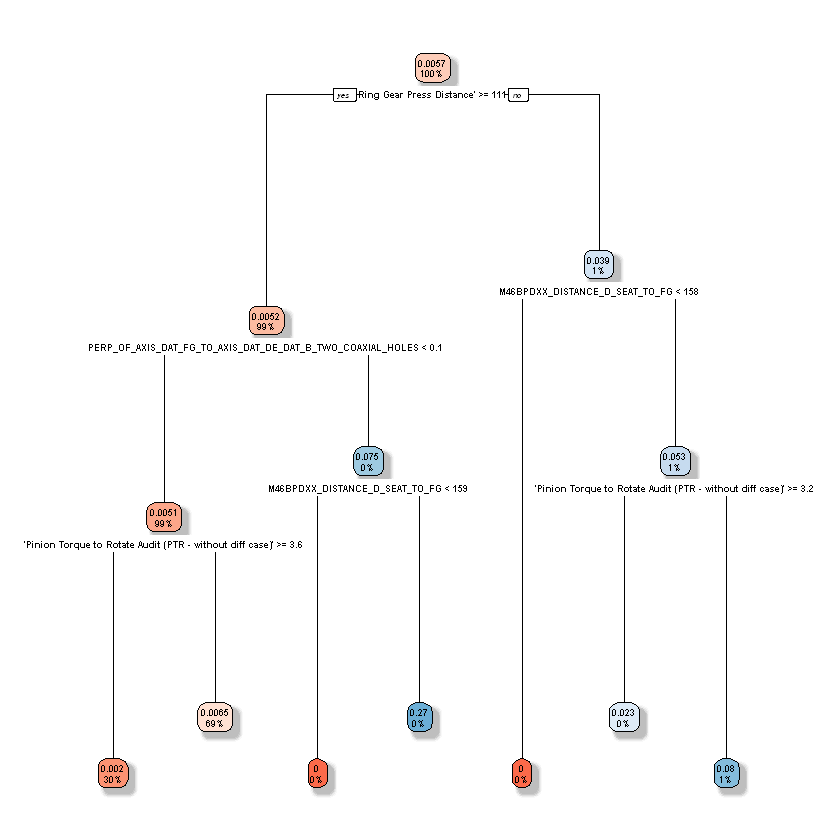

In [30]:
tree <- rpart(STATUS_ENC~., data=df[,features_backlash], control = list(maxdepth = 3),model = TRUE, cp=0)
# Visualize the decision tree with rpart.plot
rpart.plot(tree, box.palette="RdBu", shadow.col="gray", tweak = 1)

In [31]:
tree

n= 35283 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 35283 199.854900 0.005696794  
   2) 'Ring Gear Press Distance'>=110.875 34798 181.048100 0.005230186  
     4) PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES< 0.10375 34758 178.078200 0.005149894  
       8) 'Pinion Torque to Rotate Audit (PTR - without diff case)'>=3.583334 10523  20.958090 0.001995629 *
       9) 'Pinion Torque to Rotate Audit (PTR - without diff case)'< 3.583334 24235 156.969900 0.006519497 *
     5) PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES>=0.10375 40   2.775000 0.075000000  
      10) M46BPDXX_DISTANCE_D_SEAT_TO_FG< 158.513 29   0.000000 0.000000000 *
      11) M46BPDXX_DISTANCE_D_SEAT_TO_FG>=158.513 11   2.181818 0.272727300 *
   3) 'Ring Gear Press Distance'< 110.875 485  18.255670 0.039175260  
     6) M46BPDXX_DISTANCE_D_SEAT_TO_FG< 158.4898 124   0.000000 0.000000000 *
     7) M46BPDXX_DISTANCE_D_SEAT_TO_FG>=158.4898 361  18.000000 0.052631580  
 

In [86]:
list.rules.rpart <- function(model)
{
  if (!inherits(model, "rpart")) stop("Not a legitimate rpart tree")
  #
  # Get some information.
  #
  frm     <- model$frame
  names   <- row.names(frm)
  ylevels <- attr(model, "ylevels")
  ds.size <- model$frame[1,]$n
  #
  # Print each leaf node as a rule.
  #
  for (i in 1:nrow(frm))
  {
    {
      # The following [,5] is hardwired - needs work!
      cat("\n")
      cat(sprintf(" Rule number: %s ", names[i]))
      cat(sprintf("[yval=%s cover=%d (%.0f%%) prob=%0.2f]\n",
                  ylevels[frm[i,]$yval], frm[i,]$n,
                  round(100*frm[i,]$n/ds.size), frm[i,]$yval2[,5]))
      pth <- path.rpart(model, nodes=as.numeric(names[i]), print.it=FALSE)
      cat(sprintf("   %s\n", unlist(pth)[-1]), sep="")
    }
  }
}

In [90]:
list.rules.rpart(tree)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected ':'
1: list.rules.rpart(tree)[:
                           ^


In [84]:
tree$frame

,var,n,wt,dev,yval,complexity,ncompete,nsurrogate
1,'Pinion Head dist real',101606,101606,47.44455156,0.022865193,0.5555899590,4,5
2,M47BPDXX_DISTANCE_DE_TO_F_SEAT,62082,62082,1.66574064,0.010013561,0.0100342098,4,3
4,M48BPDXX_DISTANCE_DE_TO_G_SEAT,56693,56693,0.86074213,0.009159790,0.0012185906,4,5
8,<leaf>,30155,30155,0.53618325,0.008212437,0.0000000000,0,0
9,<leaf>,26538,26538,0.26674340,0.010236263,0.0000000000,0,0
5,M47BPDXX_DISTANCE_DE_TO_F_SEAT,5389,5389,0.32892992,0.018995344,0.0001830664,4,5
10,<leaf>,451,451,0.03419509,0.014794557,0.0000000000,0,0
11,<leaf>,4938,4938,0.28604933,0.019379012,0.0000000000,0,0
3,PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES,39524,39524,19.41909446,0.043051789,0.0109173605,4,5
6,M48BPDXX_DISTANCE_DE_TO_G_SEAT,13544,13544,5.79285052,0.038037982,0.0083499597,4,5


In [85]:
attr(tree, "ylevels")

NULL

In [78]:
rpart.rules(tree)

,STATUS_ENC,,,,,,,,,,,,,,,,,,
8,0.0082,when,'Pinion Head dist real',<,126,&,M48BPDXX_DISTANCE_DE_TO_G_SEAT,<,143,&,M47BPDXX_DISTANCE_DE_TO_F_SEAT,>=,,,139,,,,
9,0.0102,when,'Pinion Head dist real',<,126,&,M48BPDXX_DISTANCE_DE_TO_G_SEAT,>=,143,&,M47BPDXX_DISTANCE_DE_TO_F_SEAT,>=,,,139,,,,
10,0.0148,when,'Pinion Head dist real',<,126,,,,,&,M47BPDXX_DISTANCE_DE_TO_F_SEAT,<,139,,,,,,
11,0.0194,when,'Pinion Head dist real',<,126,,,,,&,M47BPDXX_DISTANCE_DE_TO_F_SEAT,is,139,to,139,,,,
12,0.0343,when,'Pinion Head dist real',>=,126,&,M48BPDXX_DISTANCE_DE_TO_G_SEAT,<,142,,,,,,,&,PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES,>=,105
14,0.0445,when,'Pinion Head dist real',>=,126,&,M48BPDXX_DISTANCE_DE_TO_G_SEAT,<,143,,,,,,,&,PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES,<,105
13,0.0458,when,'Pinion Head dist real',>=,126,&,M48BPDXX_DISTANCE_DE_TO_G_SEAT,>=,142,,,,,,,&,PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES,>=,105
15,0.0497,when,'Pinion Head dist real',>=,126,&,M48BPDXX_DISTANCE_DE_TO_G_SEAT,>=,143,,,,,,,&,PERP_OF_AXIS_DAT_FG_TO_AXIS_DAT_DE_DAT_B_TWO_COAXIAL_HOLES,<,105


### Print Comments